In [74]:
import json
import pandas as pd
from evals import compare_manual_vs_automatic_scores_with_viz, evaluate_f1_between_manual_and_automatic

In [81]:
manual_df = pd.read_csv("data/manual_curations_subset.csv")
manual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                165 non-null    int64  
 1   publication               165 non-null    object 
 2   pmid                      165 non-null    float64
 3   id                        162 non-null    object 
 4   gene                      165 non-null    object 
 5   inheritance               164 non-null    object 
 6   evidence_type             165 non-null    object 
 7   phenotype_quality         165 non-null    object 
 8   phenotyping_method_notes  164 non-null    object 
 9   genomic_variants          60 non-null     object 
 10  coding_variants           81 non-null     object 
 11  protein_variants          79 non-null     object 
 12  score_justification       165 non-null    object 
 13  score_range               162 non-null    object 
 14  initial_sc

In [82]:
manual_df.sample(3)

,Unnamed: 0,publication,pmid,id,gene,inheritance,evidence_type,phenotype_quality,phenotyping_method_notes,genomic_variants,coding_variants,protein_variants,score_justification,score_range,initial_score,final_score
108,185,"Long S, et al. (2019): The Clinical and Geneti...",31139143.0,P027,MECP2,de novo,Variant is de novomissense,High Confidence in Phenotype,ASD: The study retrospectively recruited patie...,NaN,NaN,NaN,Default score applied.\nDe novo missense mutat...,0-1,0.0,0.50
41,63,Lennox AL et al. (2020): Pathogenic DDX3X Mut...,32135084.0,Patient ID: 3039-0,DDX3X,: de novo,Variant is de novomissense,Low Confidence in Phenotype,ASD: This is the largest cohort of patients ha...,g.33411228C>T,c.2899C>T,p.Arg967X,Default score downgraded for phenotypic eviden...,0-1,0.0,0.25
146,236,"Zappella M, et al. (2001): Preserved speech v...",11746022.0,Patient 178.DM,MECP2,: de novo,Variant is de novomissense,High Confidence in Phenotype,ASD: The cases included in this study were eva...,NaN,NaN,NaN,Default score downgraded for genotypic evidenc...,0-1,0.0,0.25


In [83]:
with open("data/agents-scores.json") as f:
    eagle_ai_extractions = json.loads(f.read())


ENHANCED SCORE VERIFICATION SUMMARY
(Gene matching REQUIRED - only cases with matching genes are included)
(NOT SCORED cases are excluded entirely from comparison)
Total cases processed: 165
Publications with matches: 165
Cases with matches: 165
Exact score matches: 141
Overall matching rate: 100.0%
Exact match rate (of matched): 85.5%

Publication Match Types:
  - TITLE_AUTHOR_HIGH: 161
  - TITLE_HIGH: 4

Score Match Types:
  - EXACT_MATCH: 141
  - SIGNIFICANT_DIFFERENCE: 24

Score Differences:
  - Average absolute difference: 0.109
  - Median absolute difference: 0.000
  - Standard deviation: 0.291
  - Min/Max difference: 0.000 / 1.650

Case Matching Confidence:
  - Average confidence: 0.761
  - High confidence (≥0.8): 107
  - Medium confidence (≥0.5): 165
  - Low confidence (<0.5): 0


CREATING SCORE COMPARISON VISUALIZATIONS
Creating comprehensive score comparison visualizations...


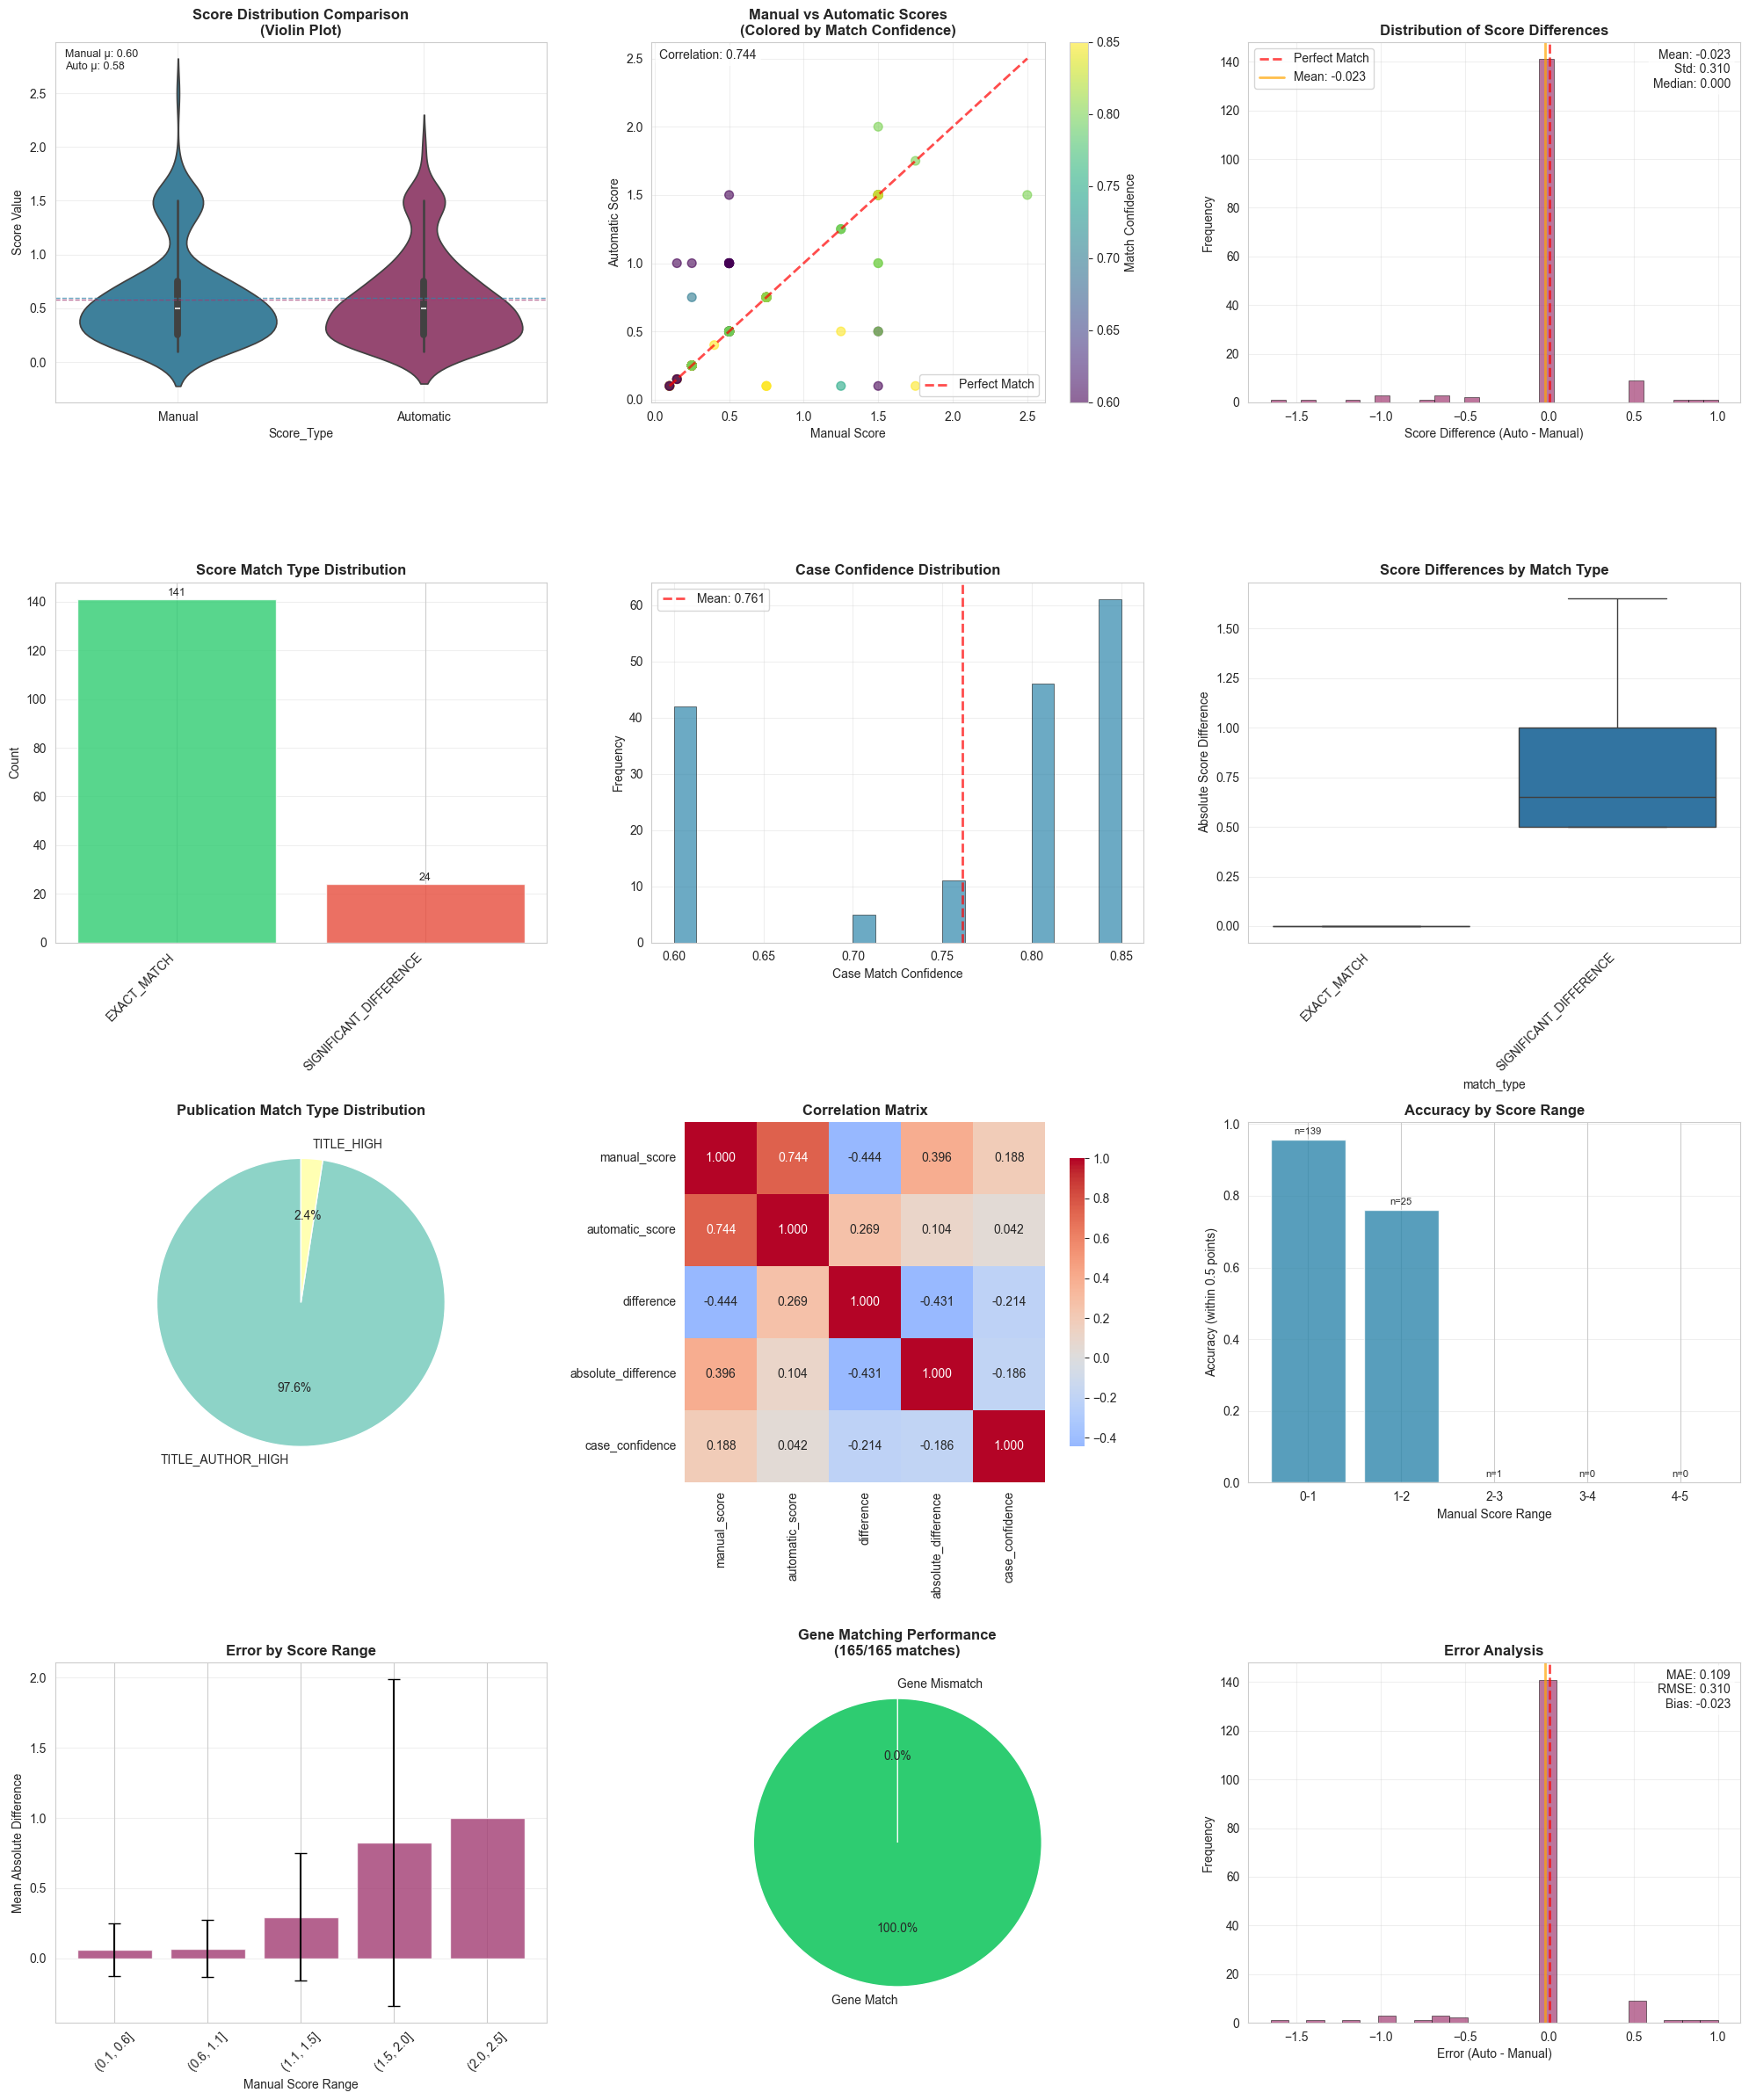

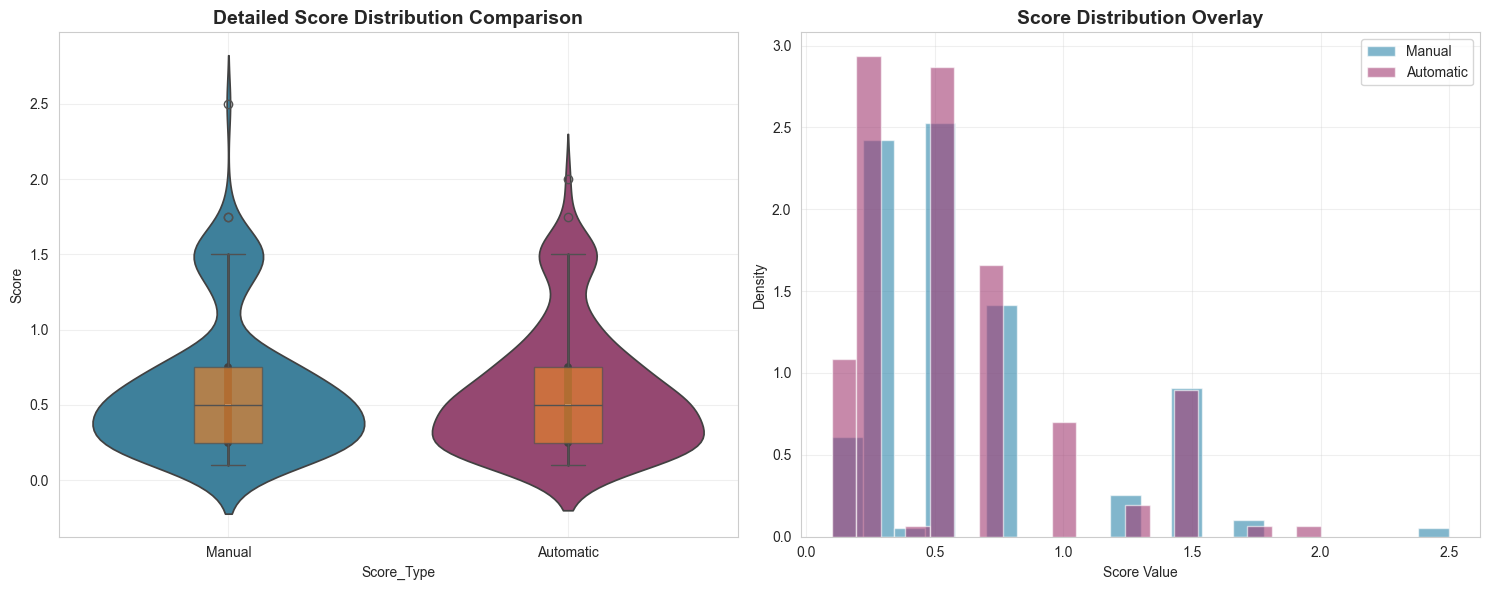

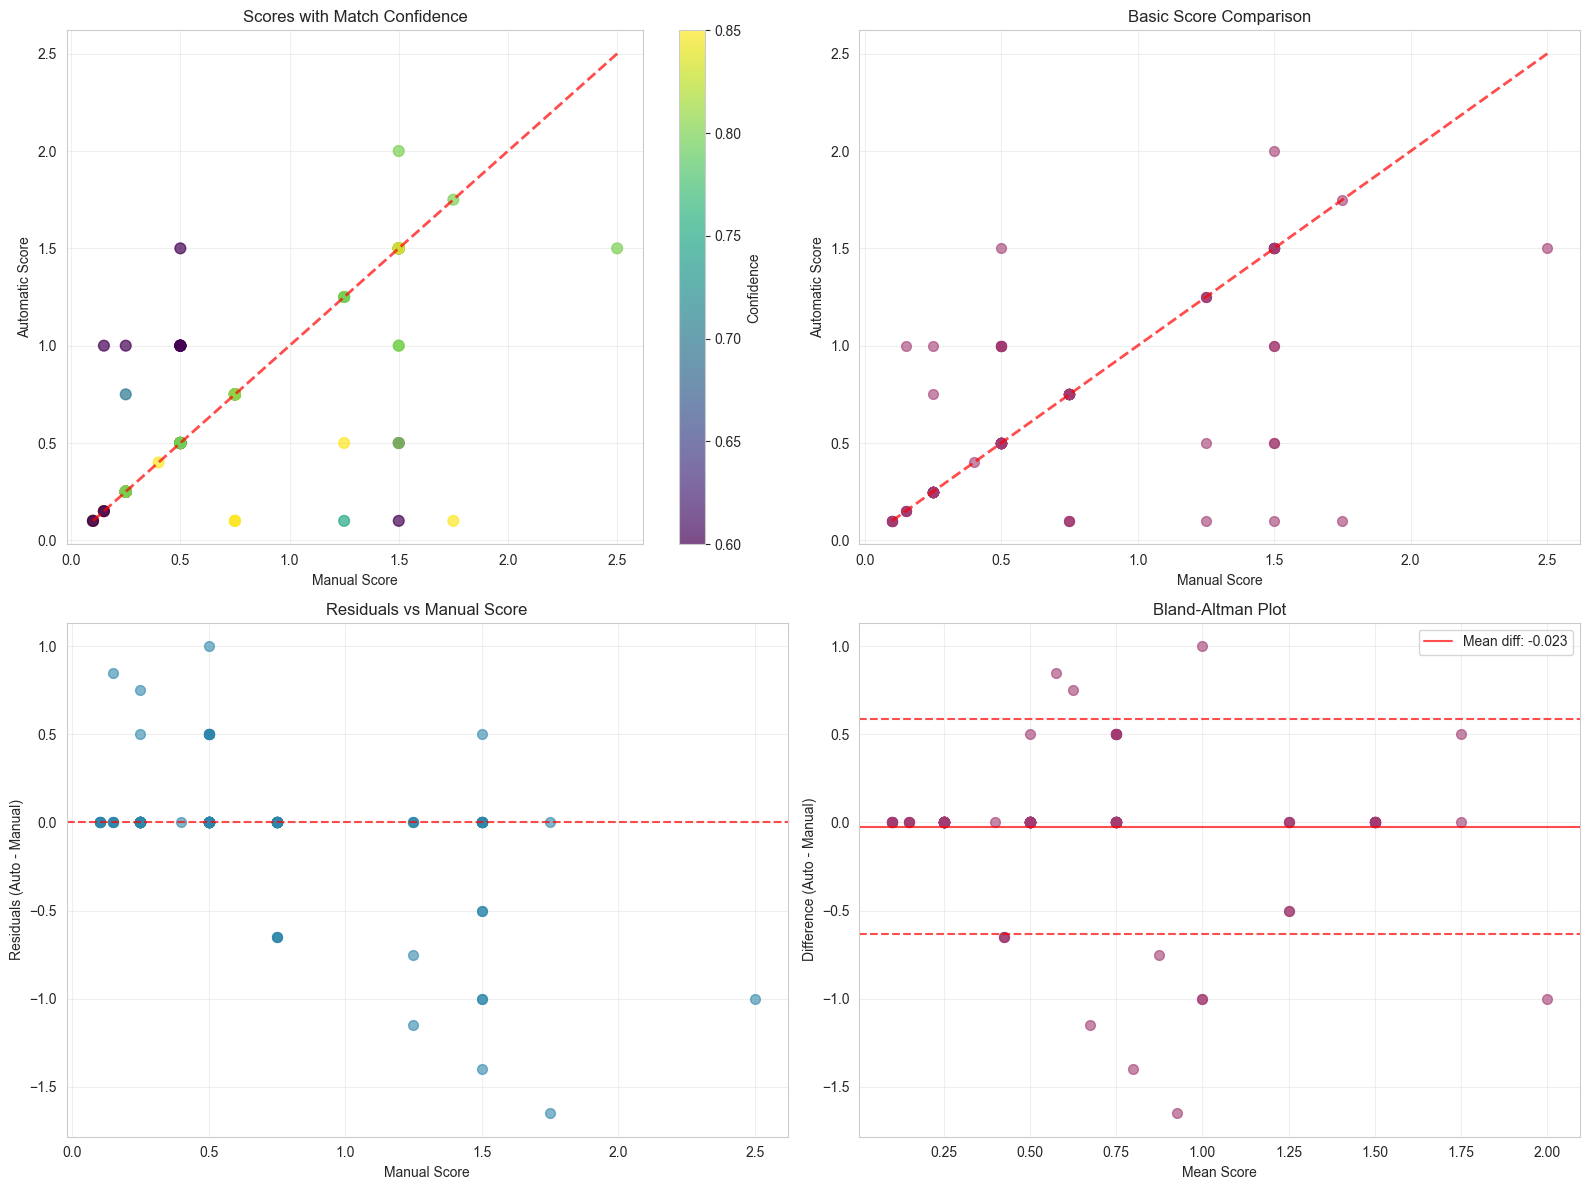

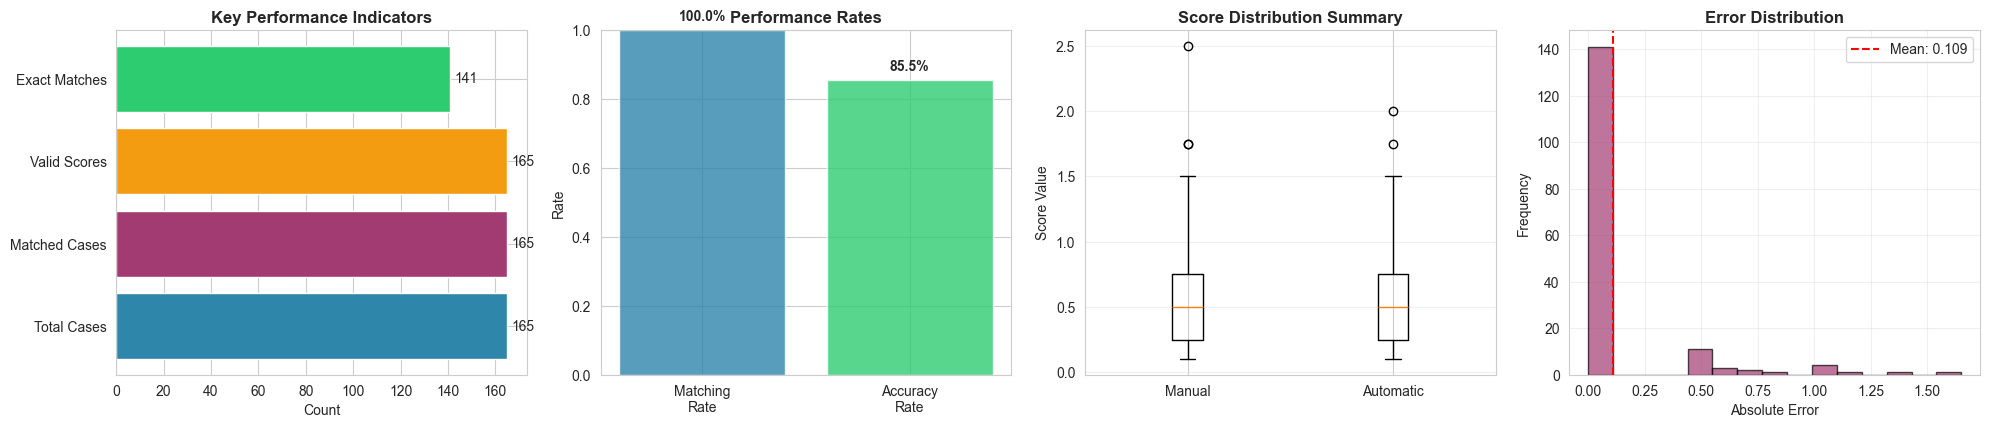


Visualization complete!


In [84]:
results = compare_manual_vs_automatic_scores_with_viz(manual_df=manual_df, auto_extractions=eagle_ai_extractions)

In [63]:
results.sample(5)

,publication_index,manual_dataset_publication,auto_extraction_dataset,case_index,manual_case_id,automatic_case_id,manual_gene,automatic_gene,manual_score,automatic_score,difference,absolute_difference,percentage_difference,scores_match,match_type,case_confidence,publication_match_type
72,41,"Ricotti V, et al. (2015): Ocular and neurodeve...","Ricotti V, et al. - Ocular and neurodevelopmen...",0,Patient 6,Individual 6,DMD,DMD,0.50,0.50,0.0,0.0,0.0,True,EXACT_MATCH,0.80,TITLE_AUTHOR_HIGH
161,74,"Saxena, A., et al (2006): Lost in translation...","Saxena A, et al. - Lost in translation: transl...",0,Patient 212. Single case reported in the study,Patient 212 (Australian case),MECP2,MECP2,0.75,0.75,0.0,0.0,0.0,True,EXACT_MATCH,0.80,TITLE_AUTHOR_HIGH
97,47,Lennox AL et al. (2020): Pathogenic DDX3X Mut...,"Lennox AL, et al. - Pathogenic DDX3X mutations...",19,Patient ID: 1954-0,1954-0,DDX3X,DDX3X,0.25,0.25,0.0,0.0,0.0,True,EXACT_MATCH,0.80,TITLE_AUTHOR_HIGH
74,42,May HJ et al. (2021): Truncating variants in t...,"May HJ, et al. - Truncating variants in the SH...",1,Patient 4,Individual 4,SHANK1,SHANK1,1.50,1.50,0.0,0.0,0.0,True,EXACT_MATCH,0.80,TITLE_AUTHOR_HIGH
9,6,"Yamashita Y, et al. (2001): Mutation analysis ...","Yamashita Y, et al. - Mutation analysis of the...",1,Patient 2,Patient 2,MECP2,MECP2,0.75,0.75,0.0,0.0,0.0,True,EXACT_MATCH,0.85,TITLE_AUTHOR_HIGH


In [64]:
f1_scores = evaluate_f1_between_manual_and_automatic(
    manual_df=manual_df,
    auto_extractions=eagle_ai_extractions
)


F1 EVALUATION REPORT

Cases (manual vs automatic):
  - Precision: 0.839
  - Recall:    1.000
  - F1:        0.912  (TP=165, FP=32, FN=0)

Phenotype quality (High/Medium/Low):
  - Micro P: 0.855, R: 0.791, F1: 0.821
  - Macro F1: 0.786
    - High   P: 0.851, R: 0.864, F1: 0.857
    - Medium P: 0.752, R: 0.712, F1: 0.731
    - Low    P: 0.830, R: 0.723, F1: 0.772
